<a href="https://colab.research.google.com/github/VitalyGladyshev/LLM-engineering/blob/main/LLM_GLVV_HW02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Attention & трансформеры

## Задание 1

Работа с Hugging Face и pipeline AP
- Выберите модель с Hugging Face для задачи суммаризации на русском языке.
- Загрузите и протестируйте ее через pipeline из библиотеки transformers.
- Протестируйте работу пайплайна на 5 различных примерах (на выбор), включая как простые, так и сложные для модели случаи, проанализируйте и оцените результаты


In [18]:
from transformers import AutoModelForCausalLM, AutoTokenizer

In [ ]:
model_name = "Qwen/Qwen3-4B-Instruct-2507"

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype="auto",
    device_map="auto"
)

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/3.99G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/99.6M [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/3.96G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/238 [00:00<?, ?B/s]

In [6]:
text_src = "В лесу родилась ёлочка, \
В лесу она росла, \
Зимой и летом стройная, \
Зелёная была. \
\
Метель ей пела песенку: \
Спи, елочка, бай-бай! \
Мороз снежком укутывал: \
Смотри, не замерзай! \
\
Трусишка зайка серенький \
Под ёлочкой скакал. \
Порою волк, сердитый волк \
Рысцою пробегал. \
\
А снег по лесу частому \
Под полозом скрипит; \
Лошадка мохноногая \
Торопиться, бежит. \
\
Везёт лошадка дровенки, \
А в дровнях старичок, \
Срубил он нашу елочку \
Под самый корешок. \
\
Теперь она, нарядная, \
На праздник к нам пришла \
И много, много радости \
Детишкам принесла."

In [ ]:
prompt = f"Выполни суммаризацию текста:\n\n{text_src}"
messages = [
    {"role": "user", "content": prompt}
]

In [ ]:
messages

[{'role': 'user',
  'content': 'Выполни суммаризацию текста:\n\nВ лесу родилась ёлочка, В лесу она росла, Зимой и летом стройная, Зелёная была. Метель ей пела песенку: Спи, елочка, бай-бай! Мороз снежком укутывал: Смотри, не замерзай! Трусишка зайка серенький Под ёлочкой скакал. Порою волк, сердитый волк Рысцою пробегал. А снег по лесу частому Под полозом скрипит; Лошадка мохноногая Торопиться, бежит. Везёт лошадка дровенки, А в дровнях старичок, Срубил он нашу елочку Под самый корешок. Теперь она, нарядная, На праздник к нам пришла И много, много радости Детишкам принесла.'}]

In [ ]:
text = tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True,
)
text

'<|im_start|>user\nВыполни суммаризацию текста:\n\nВ лесу родилась ёлочка, В лесу она росла, Зимой и летом стройная, Зелёная была. Метель ей пела песенку: Спи, елочка, бай-бай! Мороз снежком укутывал: Смотри, не замерзай! Трусишка зайка серенький Под ёлочкой скакал. Порою волк, сердитый волк Рысцою пробегал. А снег по лесу частому Под полозом скрипит; Лошадка мохноногая Торопиться, бежит. Везёт лошадка дровенки, А в дровнях старичок, Срубил он нашу елочку Под самый корешок. Теперь она, нарядная, На праздник к нам пришла И много, много радости Детишкам принесла.<|im_end|>\n<|im_start|>assistant\n'

In [ ]:
model_inputs = tokenizer([text], return_tensors="pt").to(model.device)
model_inputs

{'input_ids': tensor([[151644,    872,    198,  45610, 125648,  22621, 143433, 142556,  40773,
         127561,  70895,   1478,   1447,  16206,  25460,  22484,   3780, 129757,
         132427,   8839,    239,   3038, 134989,     11,  22933,  25460,  22484,
           3780, 129171,  18108,  22787,  30343,     11,  52577,  16104,  16339,
           7587, 128696,  12228,  29292,  16339,  43758,     11,  52577,  12121,
          44022,  43758, 129760,     13,  44358,   8178,  25428,  22132,  12141,
           5063, 131942, 132415,   5259,  35252,     25,  27499, 128662,     11,
          22132,   3038, 134989,     11,  14062,  18530,     12,   9923,  18530,
              0,  44358,   9062,  19645,   5409, 136916, 125457,  13932,  35252,
           1792,  34567,  15952,     25,  27499,  81124,  30103,     11,  18658,
         127912,   7599,   8959,  18530,      0,  50318,  19763, 124662, 131372,
         140516,  13132,  65286,  51329, 130366, 130041,   8839,    239,   3038,
          3733

In [ ]:
generated_ids = model.generate(
    **model_inputs,
    max_new_tokens=16384
)
generated_ids

tensor([[151644,    872,    198,  45610, 125648,  22621, 143433, 142556,  40773,
         127561,  70895,   1478,   1447,  16206,  25460,  22484,   3780, 129757,
         132427,   8839,    239,   3038, 134989,     11,  22933,  25460,  22484,
           3780, 129171,  18108,  22787,  30343,     11,  52577,  16104,  16339,
           7587, 128696,  12228,  29292,  16339,  43758,     11,  52577,  12121,
          44022,  43758, 129760,     13,  44358,   8178,  25428,  22132,  12141,
           5063, 131942, 132415,   5259,  35252,     25,  27499, 128662,     11,
          22132,   3038, 134989,     11,  14062,  18530,     12,   9923,  18530,
              0,  44358,   9062,  19645,   5409, 136916, 125457,  13932,  35252,
           1792,  34567,  15952,     25,  27499,  81124,  30103,     11,  18658,
         127912,   7599,   8959,  18530,      0,  50318,  19763, 124662, 131372,
         140516,  13132,  65286,  51329, 130366, 130041,   8839,    239,   3038,
          37338, 128588,  68

In [ ]:
tokenizer.decode(generated_ids[0].tolist(), skip_special_tokens=True)

'user\nВыполни суммаризацию текста:\n\nВ лесу родилась ёлочка, В лесу она росла, Зимой и летом стройная, Зелёная была. Метель ей пела песенку: Спи, елочка, бай-бай! Мороз снежком укутывал: Смотри, не замерзай! Трусишка зайка серенький Под ёлочкой скакал. Порою волк, сердитый волк Рысцою пробегал. А снег по лесу частому Под полозом скрипит; Лошадка мохноногая Торопиться, бежит. Везёт лошадка дровенки, А в дровнях старичок, Срубил он нашу елочку Под самый корешок. Теперь она, нарядная, На праздник к нам пришла И много, много радости Детишкам принесла.\nassistant\nВ лесу родилась ёлочка, которая росла всё летом и зимой. Метель и мороз заботились о ней, а зайка и волк проходили мимо. Лошадка бежала по лесу, везя дрова, в которых оказался старичок, который срубил ёлочку. Теперь ёлочка — нарядная и пришла на праздник, принеся детям много радости.'

In [ ]:
output_ids = generated_ids[0][len(model_inputs.input_ids[0]):].tolist()
print(output_ids)

[16206, 25460, 22484, 3780, 129757, 132427, 8839, 239, 3038, 134989, 11, 130407, 18108, 22787, 30343, 131896, 128696, 12228, 7587, 138812, 16339, 13, 44358, 8178, 25428, 7587, 11310, 9062, 19645, 10885, 3648, 35720, 131091, 8215, 6709, 21032, 11, 20396, 140516, 13132, 7587, 5805, 7819, 4793, 40191, 30001, 126227, 11310, 16104, 1456, 13, 124805, 1456, 12150, 22833, 13132, 14062, 49336, 95965, 17686, 25460, 22484, 3780, 11, 5805, 31885, 4235, 7796, 127830, 11, 5805, 130455, 8215, 126031, 20562, 129511, 32982, 14746, 11, 97751, 5409, 127431, 63192, 8839, 239, 3038, 37338, 35252, 13, 140650, 8839, 239, 3038, 134989, 1959, 13073, 128917, 43758, 7587, 36305, 133302, 13073, 137965, 11, 126017, 1504, 20562, 125870, 129533, 128991, 134296, 84764, 13, 151645]


In [ ]:
content = tokenizer.decode(output_ids, skip_special_tokens=True)

print("content:", content)

content: В лесу родилась ёлочка, которая росла всё летом и зимой. Метель и мороз заботились о ней, а зайка и волк проходили мимо. Лошадка бежала по лесу, везя дрова, в которых оказался старичок, который срубил ёлочку. Теперь ёлочка — нарядная и пришла на праздник, принеся детям много радости.


В лесу родилась ёлочка, которая росла всё летом и зимой. Метель и мороз заботились о ней, а зайка и волк проходили мимо. Лошадка бежала по лесу, везя дрова, в которых оказался старичок, который срубил ёлочку. Теперь ёлочка — нарядная и пришла на праздник, принеся детям много радости.

#### facebook/bart-large-cnn

In [2]:
from transformers import pipeline

In [5]:
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [6]:
res = summarizer(text_src, max_length=200, min_length=30, do_sample=False)

In [7]:
res

[{'summary_text': ' она рейна,   райще, \xa0‘прищи’,  ‘’На пра’s ‘Незёт’: ‘ Теперь,’’ ’‘”’   “Н”: “”. ”\u2009’.” ‘\xa0”,”\xa0“, ‘, ”, ’, ‚’; ”.’\xa0‚”;. “щ. \u2009\u2009, “\xa0’а  тренький ёлочкой скакал.�'}]

#### IlyaGusev/mbart_ru_sum_gazeta

In [1]:
from transformers import MBartTokenizer, MBartForConditionalGeneration

In [3]:
model_name = "IlyaGusev/mbart_ru_sum_gazeta"
tokenizer = MBartTokenizer.from_pretrained(model_name)
model = MBartForConditionalGeneration.from_pretrained(model_name).cuda()

tokenizer_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/406 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/3.47G [00:00<?, ?B/s]

Some weights of MBartForConditionalGeneration were not initialized from the model checkpoint at IlyaGusev/mbart_ru_sum_gazeta and are newly initialized: ['model.decoder.embed_tokens.weight', 'model.encoder.embed_tokens.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
print(model.device)

cuda:0


In [7]:
input_ids = tokenizer(
    [text_src],
    max_length=600,
    padding="max_length",
    truncation=True,
    return_tensors="pt",
)["input_ids"].cuda()

In [8]:
import time

In [9]:
start = time.time()

output_ids = model.generate(
    input_ids=input_ids,
    no_repeat_ngram_size=4
)[0]

end = time.time()
print(f"Время выполнения: {(end - start):.2f} секунд")

Время выполнения: 6.83 секунд


In [10]:
summary = tokenizer.decode(output_ids, skip_special_tokens=True)
print(summary)

сянуютыаминыео вр иы зао зао зау пооныеоныеа и    .нуюм .ныеоныйныеоныео.   свои зау   ся ся  . .ную .ную зау  своися  сяся .ную столилисьты зау .ную у.ную  все.ную  на .ную올. .  все .  насясяся сясясяся столилисьтсяные. . заусь все. .ные.нуюся столилисьотки.нуюсясяся....ную.ную.ныео.нуюся.ную...ные.ные.. .сь..нуюся нася..ную насяся.ную на...мечаную..ную плане..ную стол.ную. стол..


#### RussianNLP/FRED-T5-Summarizer

In [11]:
import torch
from transformers import GPT2Tokenizer, T5ForConditionalGeneration

In [12]:
tokenizer = GPT2Tokenizer.from_pretrained('RussianNLP/FRED-T5-Summarizer',eos_token='</s>')
model = T5ForConditionalGeneration.from_pretrained('RussianNLP/FRED-T5-Summarizer')
device='cuda'
model.to(device)

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/688 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/853 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.97G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/133 [00:00<?, ?B/s]

T5ForConditionalGeneration(
  (shared): Embedding(50364, 1536)
  (encoder): T5Stack(
    (embed_tokens): Embedding(50364, 1536)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1536, out_features=1536, bias=False)
              (k): Linear(in_features=1536, out_features=1536, bias=False)
              (v): Linear(in_features=1536, out_features=1536, bias=False)
              (o): Linear(in_features=1536, out_features=1536, bias=False)
              (relative_attention_bias): Embedding(32, 24)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): Linear(in_features=1536, out_features=4096, bias=False)
              (wi_1): Linear(in_features=1536, out_features=4096, bias=False)
       

In [14]:
input_text=f'<LM> Суммаризируй текст.\n {text_src}'
input_ids=torch.tensor([tokenizer.encode(input_text)]).to(device)

In [15]:
start = time.time()

outputs=model.generate(input_ids,eos_token_id=tokenizer.eos_token_id,
                    num_beams=5,
                    min_new_tokens=17,
                    max_new_tokens=200,
                    do_sample=True,
                    no_repeat_ngram_size=4,
                    top_p=0.9)

end = time.time()
print(f"Время выполнения: {(end - start):.2f} секунд")

Время выполнения: 8.20 секунд


In [16]:
print(tokenizer.decode(outputs[0][1:]))

В лесу родилась ёлочка, В лесу она росла, Зимой и летом стройная, Зелёная была. Метель ей пела песенку: Спи, елочка, бай-бай! Мороз снежком укутывал: смотри, не замерзай! Трусишка зайка серенький Под ёлочкой скакал. Порою волк, сердитый волк Рысцою пробегал. А снег по лесу частому Под полозом скрипит; Лошадка мохноногая Торопится, бежит. Везет лошадка дровенки, А в дровнях старичок. Срубил он нашу елочку Под самый корешок. Теперь она, нарядная, На праздник к нам пришла И много, много радости Детишкам принесла.</s>


## Сказка про колобка

In [ ]:
text_src = """Жили-были старик со старухой. Вот и просит старик:

– Испеки мне, старая, Колобок.

– Да из чего испечь-то? Муки нет.

– Эх, старуха! По амбару помети, по сусечкам поскреби – вот и наберется. Старушка так и сделала: намела, наскребла горсти две муки, замесила тесто на сметане, скатала Колобок, изжарила его в масле и положила на окно простынуть.

Надоело Колобку лежать: он и покатился с окна на лавку, с лавки на пол да к двери, прыг через порог в сени, из сеней на крыльцо, с крыльца на двор, а там и за ворота, дальше и дальше.

Катится Колобок по дороге, а навстречу ему заяц:

– Колобок, Колобок! Я тебя съем!

– Нет, не ешь меня, косой, а лучше послушай, какую я тебе песенку спою.

Заяц уши поднял, а Колобок запел:

Я Колобок, Колобок! По амбару метен, По сусечкам скребен, На сметане мешен, В печку сажен, На окошке стужен, Я от дедушки ушел, Я от бабушки ушел, От тебя, зайца, Не хитро уйти.

И покатился Колобок дальше – только его заяц и видел.

Катится Колобок по тропинке в лесу, а навстречу ему Серый Волк:

– Колобок, Колобок! Я тебя съем!

– Не ешь меня, Серый Волк: я тебе песенку спою.

И Колобок запел:

Я Колобок, Колобок! По амбару метен, По сусечкам скребен, На сметане мешен, В печку сажен, На окошке стужен. Я от дедушки ушел, Я от бабушки ушел, Я от зайца ушел. От тебя, волка, Не хитро уйти.

Покатился Колобок дальше – только его волк и видел.

Катится Колобок по лесу, а навстречу ему медведь идет, хворост ломает, кусты к земле гнет.

– Колобок, Колобок, я тебя съем!

– Ну где тебе, косолапому, съесть меня! Послушай лучше мою песенку.

Колобок запел, а Миша и уши развесил:

Я Колобок, Колобок! По амбару метен, По сусечкам скребен, На сметане мешен, В печку сажен, На окошке стужен. Я от дедушки ушел, Я от бабушки ушел, Я от зайца ушел, Я от волка ушел, От тебя, медведь, Полгоря уйти.

И покатился Колобок – медведь только вслед ему посмотрел.

Катится Колобок, а навстречу ему лиса:

– Здравствуй, Колобок! Какой ты пригоженький, румяненький!

Колобок рад, что его похвалили, и запел свою песенку, а лиса слушает да все ближе подкрадывается:

Я Колобок, Колобок! По амбару метен, По сусечкам скребен, На сметане мешен, В печку сажен, На окошке стужен. Я от дедушки ушел, Я от бабушки ушел, Я от зайца ушел, Я от волка ушел, От медведя ушел, От тебя, лиса, Не хитро уйти.

– Какая славная песенка! – сказала лиса. – Да то беда, голубчик, что стара я стала – плохо слышу. Сядь ко мне на мордочку да пропой еще разочек.

Колобок обрадовался, что его песенку похвалили, прыгнул лисе на морду да и запел:

Я Колобок, Колобок!..

А лиса его – гам! – и съела."""

In [ ]:
prompt = f"Выполни суммаризацию текста:\n\n{text_src}"
messages = [
    {"role": "user", "content": prompt}
]
text = tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True,
)
model_inputs = tokenizer([text], return_tensors="pt").to(model.device)
generated_ids = model.generate(
    **model_inputs,
    max_new_tokens=16384
)
output_ids = generated_ids[0][len(model_inputs.input_ids[0]):].tolist()
content = tokenizer.decode(output_ids, skip_special_tokens=True)

print("content:", content)

content: **Суммаризованное содержание текста:**

Старик и старуха испекли Колобка из муки, который, устав от лежания, покатился по дому и дальше — по дороге, в лес и на двор. По пути он встречает зайца, волка, медведя и лису, каждый из которых предлагает съесть его, но Колобок спасается песней, в которой повторяет, от кого он ушёл. В конце лиса похвалила песенку, сказала, что плохо слышит, и попросила Колобка пропеть ещё раз — и съела его.  

**Короткая суммаризация:**  
Колобок катится по дороге, избегая зверей, которые хотят его съесть, и каждый раз спасается песней, в которой отмечает, от кого он ушёл. В итоге лиса, похвалив песню, съедает его.


**Суммаризованное содержание текста:**

Старик и старуха испекли Колобка из муки, который, устав от лежания, покатился по дому и дальше — по дороге, в лес и на двор. По пути он встречает зайца, волка, медведя и лису, каждый из которых предлагает съесть его, но Колобок спасается песней, в которой повторяет, от кого он ушёл. В конце лиса похвалила песенку, сказала, что плохо слышит, и попросила Колобка пропеть ещё раз — и съела его.  

**Короткая суммаризация:**  
Колобок катится по дороге, избегая зверей, которые хотят его съесть, и каждый раз спасается песней, в которой отмечает, от кого он ушёл. В итоге лиса, похвалив песню, съедает его.

## Jingle bells

In [ ]:
import time

In [ ]:
text_src = """
Dashing through the snow
In a one-horse open sleigh
O’er the fields we go
Laughing all the way
Bells on bobtail ring
Making spirits bright
What fun it is to laugh and sing
A sleighing song tonight!

Chorus:
Jingle bells, jingle bells,
Jingle all the way.
Oh! what fun it is to ride
In a one-horse open sleigh.
Jingle bells, jingle bells,
Jingle all the way;
Oh! what fun it is to ride
In a one-horse open sleigh.

A day or two ago
I thought I’d take a ride
And soon, Miss Fanny Bright
Was seated by my side,
The horse was lean and lank
Misfortune seemed his lot
He got into a drifted bank
And then we got upset.

Chorus:
Jingle bells, jingle bells,
Jingle all the way.
Oh! what fun it is to ride
In a one-horse open sleigh.
Jingle bells, jingle bells,
Jingle all the way;
Oh! what fun it is to ride
In a one-horse open sleigh.

A day or two ago,
The story I must tell
I went out on the snow,
And on my back I fell;
A gent was riding by
In a one-horse open sleigh,
He laughed as there I sprawling lie,
But quickly drove away.

Chorus:
Jingle bells, jingle bells,
Jingle all the way.
Oh! what fun it is to ride
In a one-horse open sleigh.
Jingle bells, jingle bells,
Jingle all the way;
Oh! what fun it is to ride
In a one-horse open sleigh.

Now the ground is white
Go it while you’re young,
Take the girls tonight
and sing this sleighing song;
Just get a bobtailed bay
Two forty as his speed
Hitch him to an open sleigh
And crack! you’ll take the lead.

Chorus:
Jingle bells, jingle bells,
Jingle all the way.
Oh! what fun it is to ride
In a one-horse open sleigh.
Jingle bells, jingle bells,
Jingle all the way;
Oh! what fun it is to ride
In a one-horse open sleigh.
"""

In [ ]:
start = time.time()

prompt = f"Выполни суммаризацию текста:\n\n{text_src}"
messages = [
    {"role": "user", "content": prompt}
]
text = tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True,
)
model_inputs = tokenizer([text], return_tensors="pt").to(model.device)
generated_ids = model.generate(
    **model_inputs,
    max_new_tokens=16384
)
output_ids = generated_ids[0][len(model_inputs.input_ids[0]):].tolist()
content = tokenizer.decode(output_ids, skip_special_tokens=True)

end = time.time()
print(f"Время выполнения: {(end - start):.2f} секунд")

print("content:", content)

Время выполнения: 15.14 секунд
content: Суммаризацию текста:

Песня — весёлая и народная, посвящённая зимнему походу на санях. В ней описываются радость, веселье и приключения, связанные с ездой на одной лошади в санях. Автор рассказывает о нескольких эпизодах: счастливой поездке с дамой Фанни Брайт, неприятном падении на снегу и смехе прохожего, а также даёт совет по организации увлекательной зимней поездки — с бобтаiled лошадью, хорошей скоростью и весельем. Главная идея — радость, счастье и настроение, которое создаётся при поездке в санях, особенно в зимний период.


Песня — весёлая и народная, посвящённая зимнему походу на санях. В ней описываются радость, веселье и приключения, связанные с ездой на одной лошади в санях. Автор рассказывает о нескольких эпизодах: счастливой поездке с дамой Фанни Брайт, неприятном падении на снегу и смехе прохожего, а также даёт совет по организации увлекательной зимней поездки — с бобтаiled лошадью, хорошей скоростью и весельем. Главная идея — радость, счастье и настроение, которое создаётся при поездке в санях, особенно в зимний период.

## Новость про роботов на китайском

In [ ]:
text_src = """
8日，伴随着人形机器人的主持，2025世界机器人大会拉开帷幕。400余位国内外业界代表集中展示机器人领域最新“黑科技”，透出产业新动向。

今年4月，全球首次“人机共跑”半程马拉松在北京亦庄开跑，书写下机器人发展史上的重要一笔。今天，科技发烧友的目光再度聚焦这里。

8月8日，宇树科技人形机器人在2025世界机器人大会上进行格斗表演。新华社记者 彭韵佳 摄

8月8日，宇树科技人形机器人在2025世界机器人大会上进行格斗表演。新华社记者 彭韵佳 摄

机器人产业是展示综合科技实力的高地，是技术交叉融合的“集大成者”。今年上半年，我国机器人产业营收同比增长27.8%，连续12年保持全球最大工业机器人市场地位，制造业机器人密度已跃升至全球第3位。

从伺服电机、减速器，到人机交互、多模态感知……我国已形成机器人全产业链布局，关键环节国产化进程加快，创新要素加速向机器人领域奔涌汇聚。

“这股创新浪潮不仅是技术的迭代升级，更将带来生产力的深刻变革。”工业和信息化部副部长辛国斌在大会开幕式上说。

穿梭在大会展馆中，来自全球的一场“机器人总动员”，正用最炫酷的方式，为人们领略科技前沿、展望产业前景打开一扇窗口，宣告着未来正加速到来。

这是人类对科学幻想跨越百年的追求——20世纪20年代，“机器人”概念首次出现在科幻作品中。如今，机器人技术已实现全方位革新，轮式、四足、机械臂、人形等各类机器人不断重塑人类认知和实践边界。

从大载重工业机器人在生产线上“举重若轻”；到仿生蜜蜂、喜鹊在特殊环境下灵活航行；从人形机器人娴熟叠衣、分拣、搬运，到多维力传感器、高精度关节模组等核心零部件揭示机器人“底层密码”……

记者在大会现场看到，那些曾经只存在于科幻电影中的场景正一一落地，成为机器人向更智能、更贴近人类生活方向发展的生动注脚。

据介绍，本届大会打造创新馆、应用馆、技术馆3个展馆，展览面积约5万平方米。ABB、库卡、费斯托、宇树科技、银河通用、中信重工等200余家国内外企业带来了1500余件展品，其中首发新品超百件。

登上春晚扭秧歌、跑起马拉松、走上绿茵场……今年以来，机器人领域一个个有意义的时刻接踵而至，不断印证着在人工智能爆发式发展下，机器人产业正迎来新的机遇和可能。

面向未来，机器人产业将走向何方？工业机器人如何拥抱人工智能技术？人形机器人将在老龄化社会中扮演什么角色？

这些疑问，也许能在今年的大会上找到一些答案。

大会期间，《2025具身智能机器人发展趋势》《2025人形机器人十大潜力应用场景》等10余项成果陆续发布，为业界提供“指南针”和“风向标”。

当前，我国工业机器人正进化成为智能制造的核心引擎，服务机器人在仓储物流、商用服务、医疗康复等领域渗透率显著提升，特种机器人在深海探测、应急救援、矿山电力等领域发挥重要作用。

为加速机器人产业落地，大会打造了场景开放日、投融资对接、创新创业项目路演、人才供需对接活动等30余场配套活动，对接上下游链条，推动产业发展。同时，新加坡、东盟、尼泊尔、喀麦隆等海外团组将发布应用场景和合作需求，助力企业开拓海外市场。

“机器人大会已走过10个年头，见证和推动着机器人产业在产业提速、场景纵深、技术自主、生态成熟上不断突破，机器人赋能千行百业、走进千家万景的愿景正在加速实现。”中国电子学会理事长徐晓兰说。

向“智”奔跑！机器人产业势头强劲，未来可期！（记者温竞华、彭韵佳、阳娜）
"""

In [ ]:
start = time.time()

prompt = f"Выполни суммаризацию текста. Ответь на русском языке:\n\n{text_src}"
messages = [
    {"role": "user", "content": prompt}
]
text = tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True,
)
model_inputs = tokenizer([text], return_tensors="pt").to(model.device)
generated_ids = model.generate(
    **model_inputs,
    max_new_tokens=16384
)
output_ids = generated_ids[0][len(model_inputs.input_ids[0]):].tolist()
content = tokenizer.decode(output_ids, skip_special_tokens=True)

end = time.time()
print(f"Время выполнения: {(end - start):.2f} секунд")

print(content)

Время выполнения: 82.01 секунд
8 августа в Пекине открылся Всемирный конгресс робототехники 2025 года, где впервые на сцене выступили человекообразные роботы — в частности, роботы от компании Уси, демонстрирующие боевые действия. В ходе мероприятия более 400 представителей из разных стран и регионов представили передовые разработки в области робототехники, подчеркнув новые тенденции в отрасли.

В 2025 году робототехника достигла значительных прорывов: в апреле в Истуане прошёл первый в мире "человек-робот" марафон, а в течение года роботы начали выполнять действия, ранее считавшиеся фантастическими — от танцев на Китайском Новом Году и бега до выполнения бытовых задач, таких как сортировка и уборка. В настоящее время в Китае наблюдается рост выручки робототехнической отрасли на 27,8% в первом полугодии, страна сохраняет лидирующие позиции по объёму рынка промышленных роботов и стала третьей по показателю плотности роботов в промышленности.

Китай уже сформировал полную цепочку по произ

8 августа в Пекине открылся Всемирный конгресс робототехники 2025 года, где впервые на сцене выступили человекообразные роботы — в частности, роботы от компании Уси, демонстрирующие боевые действия. В ходе мероприятия более 400 представителей из разных стран и регионов представили передовые разработки в области робототехники, подчеркнув новые тенденции в отрасли.

В 2025 году робототехника достигла значительных прорывов: в апреле в Истуане прошёл первый в мире "человек-робот" марафон, а в течение года роботы начали выполнять действия, ранее считавшиеся фантастическими — от танцев на Китайском Новом Году и бега до выполнения бытовых задач, таких как сортировка и уборка. В настоящее время в Китае наблюдается рост выручки робототехнической отрасли на 27,8% в первом полугодии, страна сохраняет лидирующие позиции по объёму рынка промышленных роботов и стала третьей по показателю плотности роботов в промышленности.

Китай уже сформировал полную цепочку по производству роботов — от伺服двигателей и редукторов до систем взаимодействия и многомодальных сенсоров, при этом процессы национализации критических компонентов ускоряются. В отрасли активно концентрируются инновационные ресурсы, что способствует глубоким технологическим и производственным изменениям.

На открытии конгресса министр по вопросам промышленности и информационных технологий Син Гуобин отметил, что инновации в робототехнике — это не просто техническое усовершенствование, а фундаментальная трансформация производительности. В рамках мероприятия было представлено более 1500 экспонатов от 200 компаний, включая более 100 новых продуктов, а также опубликовано более 10 аналитических отчётов, в том числе о трендах в области "восприятия" (представления) и потенциальных сценариях применения человекообразных роботов.

Роботы уже активно используются в промышленности, логистике, медицине, экстренных ситуациях и глубоких исследованиях. В рамках конгресса прошли более 30 мероприятий — от презентаций и инвестиционных встреч до обмена кадровыми ресурсами. Также представили возможности сотрудничества с регионами в Сингапуре, Ассоциации Юго-Восточной Азии, Непале и Камеруне.

Лидер Китайской ассоциации электроники Лю Хуаосянь отметила, что уже через 10 лет конгресс стал важным катализатором развития отрасли — в области ускорения технологий, глубоких сценариев применения, автономии и формирования экосистемы. Робототехника сегодня активно внедряется в различные сферы жизни, и её будущее — в интеграции с искусственным интеллектом и решении вызовов, таких как старение населения.

**Итоговая суммаризация:**  
Конгресс робототехники 2025 года стал ярким свидетельством стремительного развития отрасли. Китай укрепляет позиции в глобальном робототехническом рынке, демонстрируя полную цепочку технологий, рост инноваций и внедрение роботов в повседневную жизнь. Роботы переходят от промышленного применения к бытовым и социальным задачам, а интеграция с искусственным интеллектом открывает новые горизонты. В ближайшее время робототехника станет ключевым элементом трансформации промышленности и общества.

In [ ]:
start = time.time()

prompt = f"Выполни короткую суммаризацию текста. Выведи только итоговую короткую суммаризацию на русском языке:\n\n{text_src}"
messages = [
    {"role": "user", "content": prompt}
]
text = tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True,
)
model_inputs = tokenizer([text], return_tensors="pt").to(model.device)
generated_ids = model.generate(
    **model_inputs,
    max_new_tokens=16384
)
output_ids = generated_ids[0][len(model_inputs.input_ids[0]):].tolist()
content = tokenizer.decode(output_ids, skip_special_tokens=True)

end = time.time()
print(f"Время выполнения: {(end - start):.2f} секунд")

print(content)

Время выполнения: 23.83 секунд
На 8-м августе 2025 года открылся Всемирный конгресс робототехники, где были представлены передовые достижения в области робототехники, включая демонстрации человеко-подобных роботов. В ходе мероприятия были представлены более 1500 экспонатов от 200 компаний, в том числе более 100 новинок. Китай укрепил своё лидерство в производстве промышленных роботов, а также продвигает развитие полной цепочки технологий, включая ключевые компоненты. Важные направления — интеграция искусственного интеллекта, применение роботов в здравоохранении, логистике, экстренных ситуациях и старении населения. В ходе конгресса были опубликованы 10+ исследовательских отчётов, а также проведены мероприятия по привлечению инвестиций и развитию экосистемы. Робототехника переходит от научной фантастики к реальным приложениям, и её развитие открывает перспективы для трансформации промышленности и повседневной жизни.


На 8-м августе 2025 года открылся Всемирный конгресс робототехники, где были представлены передовые достижения в области робототехники, включая демонстрации человеко-подобных роботов. В ходе мероприятия были представлены более 1500 экспонатов от 200 компаний, в том числе более 100 новинок. Китай укрепил своё лидерство в производстве промышленных роботов, а также продвигает развитие полной цепочки технологий, включая ключевые компоненты. Важные направления — интеграция искусственного интеллекта, применение роботов в здравоохранении, логистике, экстренных ситуациях и старении населения. В ходе конгресса были опубликованы 10+ исследовательских отчётов, а также проведены мероприятия по привлечению инвестиций и развитию экосистемы. Робототехника переходит от научной фантастики к реальным приложениям, и её развитие открывает перспективы для трансформации промышленности и повседневной жизни.

## Задание 2

Анализ эмбеддингов трансформерных моделей
- Используя библиотеку sentence-transformers, загрузите две различные модели - одну на основе BERT, другую на основе GPT.

Для каждой модели:
- Получите эмбеддинги для 10 различных предложений.
- Визуализируйте полученные эмбеддинги с помощью t-SNE или PCA.
- Сравните, насколько близки между собой эмбеддинги синонимичных предложений


In [ ]:
start = time.time()

prompt = f"Выведи пять различных пар предложений. Предложения в паре должны выражать один смысл разными словами для оценки семантического сходства"
messages = [
    {"role": "user", "content": prompt}
]
text = tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True,
)
model_inputs = tokenizer([text], return_tensors="pt").to(model.device)
generated_ids = model.generate(
    **model_inputs,
    max_new_tokens=16384
)
output_ids = generated_ids[0][len(model_inputs.input_ids[0]):].tolist()
content = tokenizer.decode(output_ids, skip_special_tokens=True)

end = time.time()
print(f"Время выполнения: {(end - start):.2f} секунд")

print(content)

Время выполнения: 23.32 секунд
Конечно! Ниже приведены **пять различных пар предложений**, каждая из которых выражает **один и тот же смысл**, но с использованием **разных слов и структур** — для оценки семантического сходства.

---

**1.**  
А) Он пришёл слишком поздно.  
Б) Он опоздал на встречу.

---

**2.**  
А) Ученик не сдал работу.  
Б) Домашнее задание было отклонено.

---

**3.**  
А) Погода была плохой, поэтому мы не пошли в парк.  
Б) Из-за неблагоприятных условий мы отменили поход в парк.

---

**4.**  
А) Она не хотела говорить, потому что боялась.  
Б) Она молчала из-за страха.

---

**5.**  
А) В этом месяце не было дождей.  
Б) Дождя не было в течение всего месяца.

---

Эти пары демонстрируют **семантическое сходство** — они передают один и тот же смысл, но с разной лексикой, грамматической структурой и фразеологией. Это полезно для анализа сходства в задачах, таких как поиск синонимов, репликация текстов или построение моделей понимания языка.


Конечно! Ниже приведены **пять различных пар предложений**, каждая из которых выражает **один и тот же смысл**, но с использованием **разных слов и структур** — для оценки семантического сходства.

---

**1.**  
А) Он пришёл слишком поздно.  
Б) Он опоздал на встречу.

---

**2.**  
А) Ученик не сдал работу.  
Б) Домашнее задание было отклонено.

---

**3.**  
А) Погода была плохой, поэтому мы не пошли в парк.  
Б) Из-за неблагоприятных условий мы отменили поход в парк.

---

**4.**  
А) Она не хотела говорить, потому что боялась.  
Б) Она молчала из-за страха.

---

**5.**  
А) В этом месяце не было дождей.  
Б) Дождя не было в течение всего месяца.

---

Эти пары демонстрируют **семантическое сходство** — они передают один и тот же смысл, но с разной лексикой, грамматической структурой и фразеологией. Это полезно для анализа сходства в задачах, таких как поиск синонимов, репликация текстов или построение моделей понимания языка.

In [17]:
sentences = [
    "Он пришёл слишком поздно.",
    "Он опоздал на встречу.",
    "Ученик не сдал работу.",
    "Домашнее задание было отклонено.",
    "Погода была плохой, поэтому мы не пошли в парк.",
    "Из-за неблагоприятных условий мы отменили поход в парк.",
    "Она не хотела говорить, потому что боялась.",
    "Она молчала из-за страха.",
    "В этом месяце не было дождей.",
    "Дождя не было в течение всего месяца.",
]

In [ ]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [19]:
from sentence_transformers import SentenceTransformer, models

## BERT

In [20]:
bert_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [21]:
bert_embeddings = bert_model.encode(sentences)

print(bert_embeddings.shape)

(10, 384)


## GPT 2

In [22]:
word_embedding_model = models.Transformer('gpt2')

# Установка pad_token для токенизатора - у gpt-токенизатора по умолчанию нет padding-токена, поэтому мы его добавим
word_embedding_model.tokenizer.pad_token = word_embedding_model.tokenizer.eos_token

# Добавление pooling слоя
pooling_model = models.Pooling(
    word_embedding_model.get_word_embedding_dimension(),
    pooling_mode_mean_tokens=True,
    pooling_mode_cls_token=False,
    pooling_mode_max_tokens=False
)

gpt_model = SentenceTransformer(modules=[word_embedding_model, pooling_model])

gpt_embeddings = gpt_model.encode(sentences)
print(f"Размерность: {gpt_embeddings.shape}")

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Размерность: (10, 768)


## Визуализировать эмбеддинги

In [23]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

### PCA BERT

In [24]:
pca_bert = PCA(n_components=2)
pca_bert_embeddings = pca_bert.fit_transform(bert_embeddings)

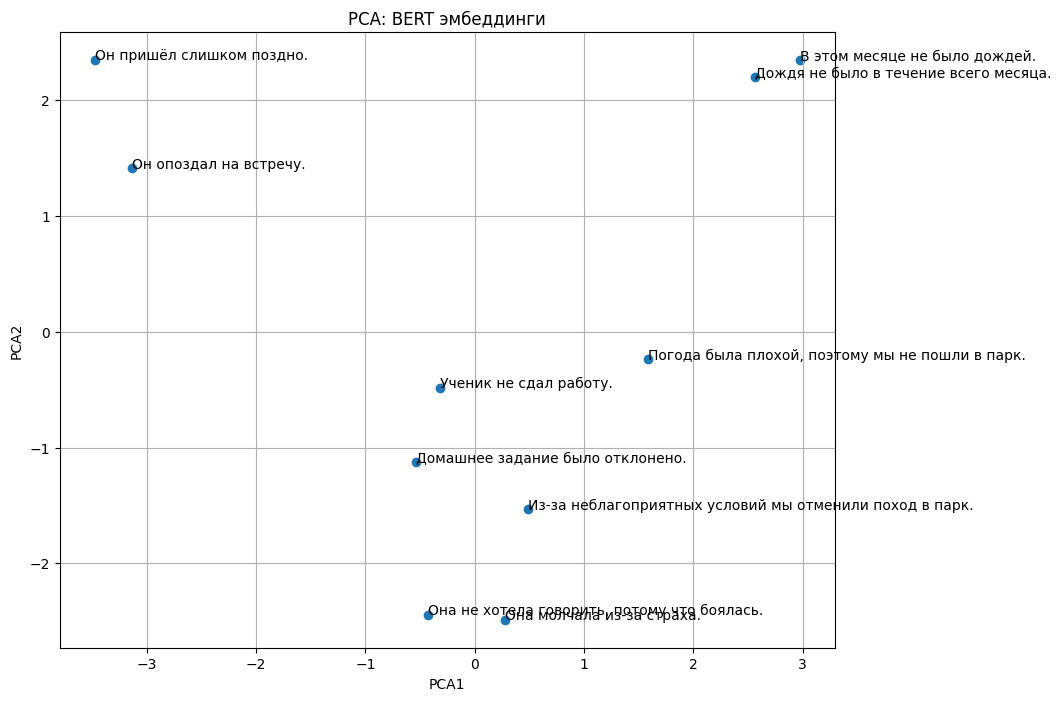

In [25]:
plt.figure(figsize=(10, 8))
plt.scatter([pca_bert_embeddings[i][0] for i in range(len(pca_bert_embeddings))],
            [pca_bert_embeddings[i][1] for i in range(len(pca_bert_embeddings))]
            )
for i, sentence in enumerate(sentences):
    plt.annotate(sentence, pca_bert_embeddings[i])
plt.title('PCA: BERT эмбеддинги')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()

### PCA GPT

In [26]:
pca_gpt = PCA(n_components=2)
pca_gpt_embeddings = pca_gpt.fit_transform(gpt_embeddings)

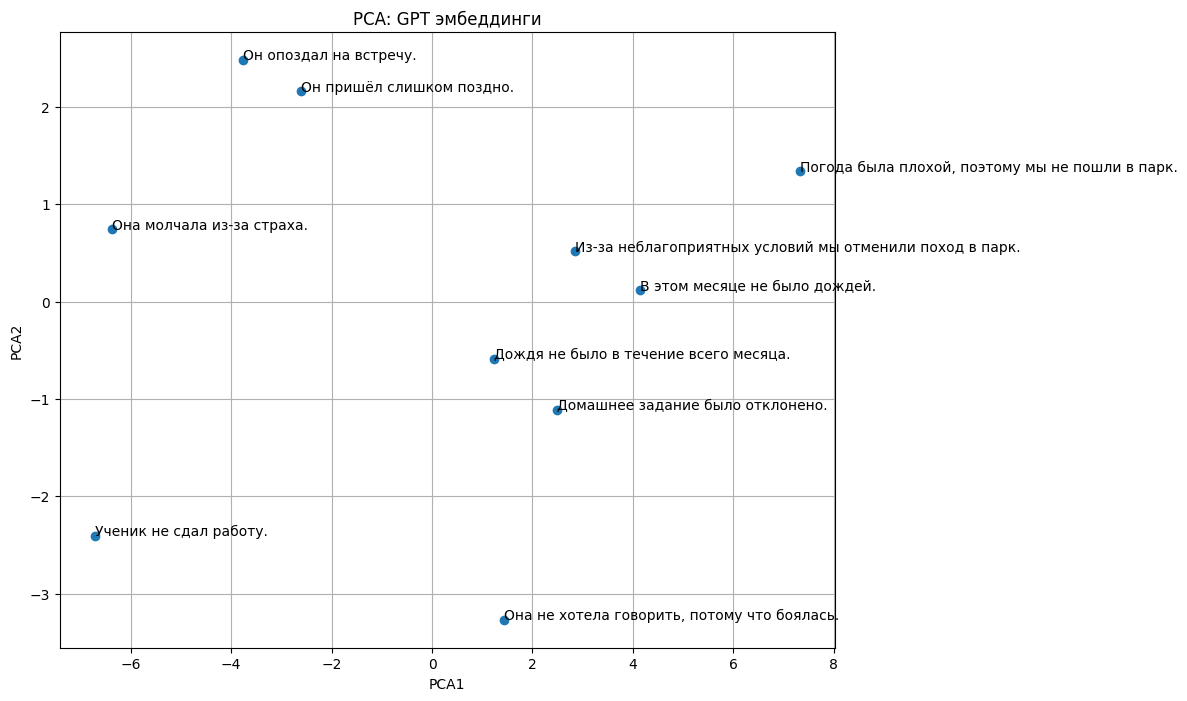

In [27]:
plt.figure(figsize=(10, 8))
plt.scatter([pca_gpt_embeddings[i][0] for i in range(len(pca_gpt_embeddings))],
            [pca_gpt_embeddings[i][1] for i in range(len(pca_gpt_embeddings))]
            )
for i, sentence in enumerate(sentences):
    plt.annotate(sentence, pca_gpt_embeddings[i])
plt.title('PCA: GPT эмбеддинги')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()

### TSNE BERT

In [28]:
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
tsne_bert_embeddings = tsne.fit_transform(bert_embeddings)

In [29]:
tsne_bert_embeddings

array([[ 98.44891  ,  57.849995 ],
       [ 96.24557  ,  29.446249 ],
       [ 61.770126 , -19.035215 ],
       [ 35.989418 , -32.49062  ],
       [ 12.511063 ,  38.131863 ],
       [ 12.0269165,   8.794896 ],
       [-26.50481  , -40.108505 ],
       [-47.0819   , -20.738342 ],
       [-45.54804  ,  71.51973  ],
       [-18.665342 ,  80.5198   ]], dtype=float32)

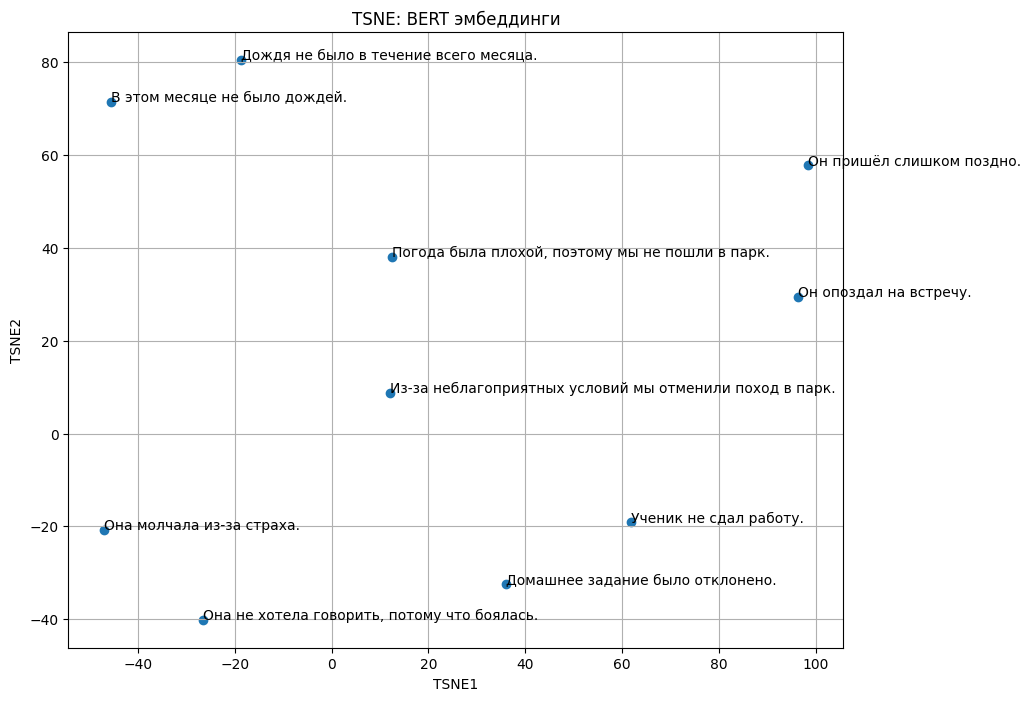

In [30]:
plt.figure(figsize=(10, 8))
plt.scatter([tsne_bert_embeddings[i][0] for i in range(len(tsne_bert_embeddings))],
            [tsne_bert_embeddings[i][1] for i in range(len(tsne_bert_embeddings))]
            )
for i, sentence in enumerate(sentences):
    plt.annotate(sentence, tsne_bert_embeddings[i])
plt.title('TSNE: BERT эмбеддинги')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.grid(True)
plt.show()

### TSNE GPT

In [31]:
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
tsne_gpt_embeddings = tsne.fit_transform(gpt_embeddings)

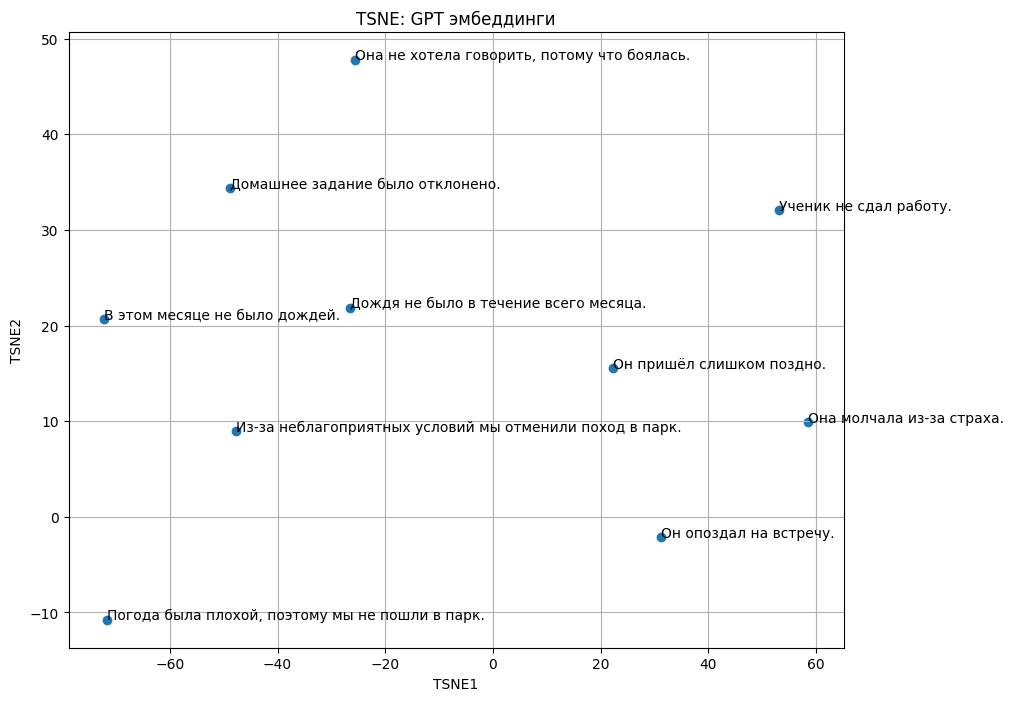

In [32]:
plt.figure(figsize=(10, 8))
plt.scatter([tsne_gpt_embeddings[i][0] for i in range(len(tsne_gpt_embeddings))],
            [tsne_gpt_embeddings[i][1] for i in range(len(tsne_gpt_embeddings))]
            )
for i, sentence in enumerate(sentences):
    plt.annotate(sentence, tsne_gpt_embeddings[i])
plt.title('TSNE: GPT эмбеддинги')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.grid(True)
plt.show()

## Задание 3

Сравнение с классическими методами NLP
- Для задачи классификации текстов из датасета lenta-ru-news по рубрикам насэмплируйте небольшое подмножество датасета 5-10к строк)

Реализуйте:
- Классический подход с TFIDF и LogisticRegression (или любой другой пайплайн на выбор)
- Подход с использованием готовых эмбеддингов из sentence-transformers (с моделью на выбор) и LogisticRegression
- Подход с использованием pipeline для zero-shot классификации (с моделью на выбор)
- Сравните качество трех подходов на тестовой выборке
